In [1]:
import sys, os, glob, time
import numpy as N
import subprocess as sp
import pylab as pl
# import matplotlib.pyplot as pl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
rc('font',**{'family':'serif'})
time_init_start = time.time()

# ==============================================
# Read.& proc. toolkit for data sets' structure.
# ==============================================
from read_usertools import UserTools, Plotter

# ==============================================
# Reading toolkit for data sets' structure.
# ==============================================
from read_misctools import MiscTools

# ==============================================
# File interpreters for read.py's interface.
# ==============================================
from read_sifters import Sifters

# ==============================================
# Reading procedure for data sets' structure.
# ==============================================
from read_procedures import readProcedures

# ==============================================
# Argument interpreter for read.py's interface.
# ==============================================
from read_args import readArgs

# ==============================================
# Indra data sets' reading MO.
# ==============================================
from read import readDo

def read_ini( what="pos", indraN=0, iA=0, iB=0, subfolder=None, fftfile=None, \
              tmpfolder=False, sortIDs=False, lessprint=True,                 \
              box_params=False, plotdim=2,                                    \
              w2f=False, plotdata=False,                                      \
              outputpath=False,                                               \
              origamipath=False                                               ):
    """
    Simplified read function for importing externally;
    initializes class for the user.
    # WIP !
    """
    data_params = \
        {
            # Data structure parameters:
               "what" :( list(what) ),
             "indraN" :( indraN     ),
                 "iA" :( iA         ),
                 "iB" :( iB         ),
          "subfolder" :( subfolder  ),   
            "fftfile" :( fftfile    ),
            # Reading options:
          "tmpfolder" :( tmpfolder  ),
            "sortIDs" :( sortIDs    ),
          "lessprint" :( lessprint  ),
            
            # Extracts data from a coordinate box at positions specified:
         "box_params" :( box_params ), 
            # Apply floats as "([min,max], [min,max], [min,max])" in Mpc/h units,
            # respectively for directions x, y, z. # Turned off w/: None/False
            "plotdim" :( plotdim    ), # Dimensions projected in plot
            
            # Write 2 file: Probably a bad idea ...
                "w2f" :( w2f        ),
           "plotdata" :( plotdata   ),
            # Desired output filepath, 
            # or False (program storing to user's own folder).
         "outputpath" :( outputpath ),
            # Origami functionality
        "origamipath" :( origamipath)
        }

    tmp = sp.call('clear',shell=True)

    ini = readDo()                # Initialize!
    ini.read_params = data_params # Set params
    " 1. "
    ini.callArgsChecker()         # Verify values
    " 2. "
    return ini.beginReading()     # Do the thing

time_init_end = time.time()

print "Initialization time: {0:.2f} seconds".format((time_init_end - time_init_start))

Initialization time: 0.04 seconds


In [2]:
" The simplified function call: "
# =============================

time_binread_start = time.time()

IDs, pos = read_ini(
                          what       = ["pos"], # "vel", "fof", etc 
                          indraN     = 2,
                          iA         = 0,
                          iB         = 0,
                          subfolder  = 63,
                          tmpfolder  = True
                        )
do = UserTools() # Initialize toolkit

time_binread_end = time.time()

print "Binary reading time: {0:.2f} seconds".format((time_binread_end - time_binread_start))


 Total parameters loaded: 14
 Parameters initialized with values:
        what : ['pos']
      indraN :      2
          iA :      0
          iB :      0
   subfolder :     63
   tmpfolder :   True
     sortIDs :  False
   lessprint :   True
         w2f :  False
    plotdata :  False
  outputpath :  False
  box_params :  False
     plotdim :      2
 origamipath :  False

            All necessary parameters have been set. Continuing...
            
        Currently reading:
        Data type   :    pos   (/out of sets:   'pos'    )
        indraN      :      2             ( /:     2      )
        iA          :      0             ( /:     0      )
        iB          :      0             ( /:     0      )
        subfolder   :     63             ( /:     63     )
        
  * Accessing file:	indra2tmp/snap63/file.0   (pos) ...
  * Accessing file:	indra2tmp/snap63/file.50  (pos) ...
  * Accessing file:	indra2tmp/snap63/file.100 (pos) ...
  * Accessing file:	indra2tmp/snap63/file.150

In [3]:

# ------------------------------ #
# Here begins data manipulation! #
# ------------------------------ #


In [4]:
# =================================
# Apply box: lessen amount of data:
# =================================
time_box_start = time.time()

box_params = [0.,60.], [0.,60.], [0.,60.] # Note: box parameters is 3x2 iterable.
box3D = do.box_indexer(pos, box_params)   # This is one way to do it..
print "box3D.shape", box3D.shape

IDs_B   = IDs[box3D] #IDs: also ind.val.s of part.s relative to a sorted part.s'- or tags' array
pos_B   = pos[box3D] #_B means boxed

time_box_end = time.time()

# Alternatively; this boxes pos, + boxes of another array based on pos-box:
# IDs, pos, vel = do.arrboxes(IDs, pos, vel, box_params)

print "No. of particles after box exclusion: {0:g} (~ {1:g}% of total)"\
        .format(pos_B.shape[0], (pos_B.shape[0]/(1024.**3.)))
print "Boxing time: {0:.2f} seconds".format((time_box_end - time_box_start))


  * Boxing indexation commenced 
  * Boxing indexation retrieved 
box3D.shape (1073741824,)
No. of particles after box exclusion: 261883 (~ 0.000243898% of total)
Boxing time: 57.91 seconds


In [5]:
# =======================================
# Sorting particles after ID tag numbers:
# =======================================
time_sort_start = time.time()

" Below not strictly necessary - may be done from the reading process; but works! "
IDs_S, pos_S = do.sort_from_IDsF(IDsA=IDs_B, posA=pos_B, velA=None, focus="pos")
    # \=> Because focus=="pos", then vel==None ### S for sorted
    
time_sort_end = time.time()
print "Sorting time {0:.2f} seconds".format((time_sort_end - time_sort_start))

# time_sort_start_big = time.time()
# IDs_Sbig, pos_Sbig = do.sort_from_IDsF(IDsA=IDs, posA=pos, velA=None, focus="pos")
# time_sort_end_big = time.time()
# print "Sorting time (big matrix) {0:.2f} seconds".format((time_sort_end_big - time_sort_start_big))

  * Sorting IDs now ...
    \=> IDs sorted.
  * Sorting positions.
    \=> positions' array now sorted by ID tag.

Sorting time 0.05 seconds


In [6]:
# ===========================
# Plot device. Dun-dun-DUUUN!
# ===========================

# Initialize
gplot = Plotter()

In [7]:
# =======================================
# Origami reading - auto-processed data
# =======================================
OR = readDo() # going to compare with my automated origami set, just to be sure
OR.origamipath = "/home/idies/workspace/indra/origami/i200tmp/i200tmp_sf63_tag.dat"

time_OR_start = time.time()
tags          = OR.read_origami()[1]
time_OR_end   = time.time()

print "Origami reader time: {0:.2f} seconds".format((time_OR_end - time_OR_start))
print "type(tags)", type(tags), "tags.shape", tags.shape

Origami reader time: 1.11 seconds
type(tags) <type 'numpy.ndarray'> tags.shape (1073741824,)


In [8]:
# Tag-specific plot variables
voidc = 'k'
wallc = 'b' 
filac = 'm'
haloc = 'r'    
voidl = "Void"   #label
walll = "Wall"   #label
filal = "Filam." #label
halol = "Halo"   #label


In [9]:
# =======================================
# Origami tag 'sort' & var.s-simplifying
# =======================================
# boxed IDs used to 'sort' tags-array according to how positions are read
tags_B = tags[IDs_B]
print "boxed tags shape", tags_B.shape

vtags_B = tags_B==0 # Another boolean matrix; True, False, False, True, etc...
wtags_B = tags_B==1
ftags_B = tags_B==2
htags_B = tags_B==3

pos_Bvoid = pos_B[vtags_B,:]
pos_Bwall = pos_B[wtags_B,:]
pos_Bfila = pos_B[ftags_B,:]
pos_Bhalo = pos_B[htags_B,:]

print "void tags shape       :", vtags_B.shape
print "wall tags shape       :", wtags_B.shape
print "fila tags shape       :", ftags_B.shape
print "halo tags shape       :", htags_B.shape

print "old 'sort' vs new: equal?", N.array_equal(pos_B[tags[box3D]==0,:], pos_B[vtags_B])
print
print "old void partl.s shape:", pos_B[tags[box3D]==0,:].shape
print "new void partl.s shape:", pos_B[vtags_B].shape
# The new 'sorting' should be a correction upon the old one; thus numbers shouldn't be the same.
print
print "old wall partl.s shape:", pos_B[tags[box3D]==1,:].shape
print "new wall partl.s shape:", pos_B[wtags_B].shape
print
print "old fila partl.s shape:", pos_B[tags[box3D]==2,:].shape
print "new fila partl.s shape:", pos_B[ftags_B].shape
print
print "old halo partl.s shape:", pos_B[tags[box3D]==3,:].shape
print "new halo partl.s shape:", pos_B[htags_B].shape

boxed tags shape (261883,)
void tags shape       : (261883,)
wall tags shape       : (261883,)
fila tags shape       : (261883,)
halo tags shape       : (261883,)
old 'sort' vs new: equal? False

old void partl.s shape: (75835, 3)
new void partl.s shape: (70812, 3)

old wall partl.s shape: (50615, 3)
new wall partl.s shape: (47710, 3)

old fila partl.s shape: (49594, 3)
new fila partl.s shape: (48494, 3)

old halo partl.s shape: (85839, 3)
new halo partl.s shape: (94867, 3)


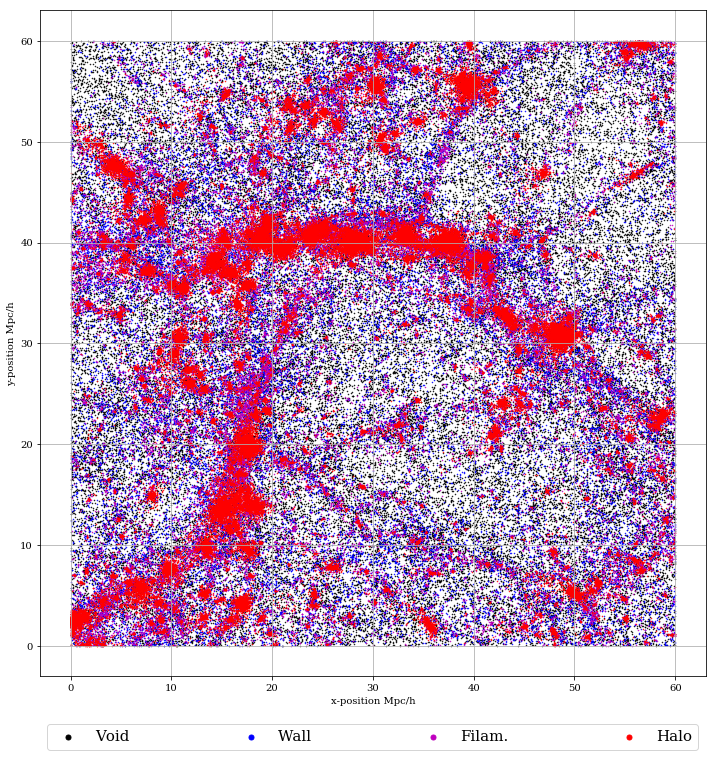

2D scatter plot time: 3.70 seconds


In [10]:
# 2D scatter plot
time_2dplot_start = time.time()

" Defaults to 2 dimensions in plot "
fig = pl.figure("scatter2d", figsize=(10,10))#, dpi=200)
ax  = fig.add_subplot(111)

ax.scatter(pos_Bvoid[:,0], pos_Bvoid[:,1], s=1, c=voidc, marker='.', label=voidl)
ax.scatter(pos_Bwall[:,0], pos_Bwall[:,1], s=1, c=wallc, marker='.', label=walll)
ax.scatter(pos_Bfila[:,0], pos_Bfila[:,1], s=1, c=filac, marker='.', label=filal)
ax.scatter(pos_Bhalo[:,0], pos_Bhalo[:,1], s=1, c=haloc, marker='.', label=halol)

ax.set_xlabel('x-position Mpc/h')
ax.set_ylabel('y-position Mpc/h')
ax.set_aspect('equal','box')
ax.legend(bbox_to_anchor=(0,0.14, 1,-0.2), loc="upper left", mode="expand", ncol=4, prop={'size':15}, markerscale=10)
ax.grid(True)
fig.tight_layout()
pl.show("scatter2d")

time_2dplot_end = time.time()
print "2D scatter plot time: {0:.2f} seconds".format((time_2dplot_end - time_2dplot_start))

In [11]:
pl.close("scatter2d") # just because

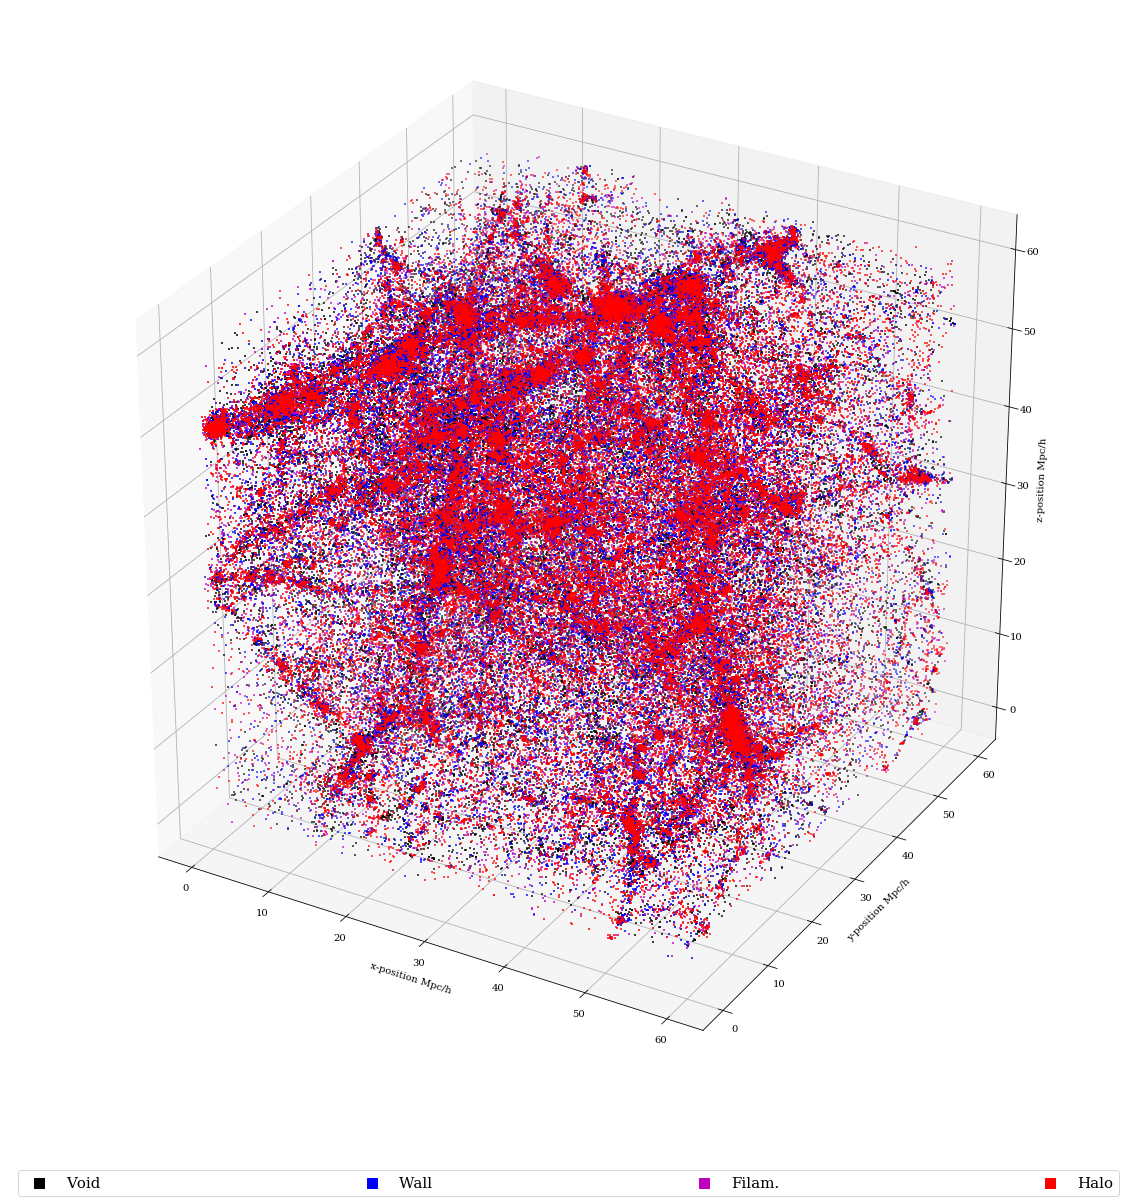

3D scatter plot time: 48.15 seconds


In [12]:
# 3D scatter plot
time_3dplot_start = time.time()

" In case of 3d "
fig =  pl.figure("scatter3d", figsize=(20,20))#, dpi=200)
ax  = fig.add_subplot(111, projection='3d')
# In the voice of an authorative Patrick Stewart:
" ENGAGE 3D VIZUALIZATION "
ax.scatter(pos_B[tags[box3D]==0,0], pos_B[tags[box3D]==0,1], pos_B[tags[box3D]==0,2], s=1, c=voidc, marker=',', label=voidl)
ax.scatter(pos_B[tags[box3D]==1,0], pos_B[tags[box3D]==1,1], pos_B[tags[box3D]==1,2], s=1, c=wallc, marker=',', label=walll)
ax.scatter(pos_B[tags[box3D]==2,0], pos_B[tags[box3D]==2,1], pos_B[tags[box3D]==2,2], s=1, c=filac, marker=',', label=filal)
ax.scatter(pos_B[tags[box3D]==3,0], pos_B[tags[box3D]==3,1], pos_B[tags[box3D]==3,2], s=1, c=haloc, marker=',', label=halol)
ax.set_xlabel('x-position Mpc/h')
ax.set_ylabel('y-position Mpc/h')
ax.set_zlabel('z-position Mpc/h')
ax.legend(bbox_to_anchor=(0,0.14, 1,-0.2), loc="upper left", mode="expand", ncol=4, prop={'size':15}, markerscale=10)

gplot.axisEqual3D(ax) # Axes aspect ratio correction
pl.show("scatter3d")

time_3dplot_end = time.time()
print "3D scatter plot time: {0:.2f} seconds".format((time_3dplot_end - time_3dplot_start))

In [13]:
pl.close("scatter3d") # just because

In [14]:
print os.getcwd()

/home/idies/workspace/persistent/gravipy/pyread


In [15]:
# # Array debugging - introducing the automatic method

# # --- Origami reading - manual inputs (automatic listed above)
# aOR = readDo() # an unperturbed instance
# aOR.origamipath = \
#     "/home/idies/workspace/indra/origami/testrun/output_i200tmp_sf63/positions_i200tmp_sf63_test"
# atags = aOR.read_origami()[1]

# pos_Bvoid = pos_B[tags[box3D]==0,:]
# pos_Bwall = pos_B[tags[box3D]==1,:]
# pos_Bfila = pos_B[tags[box3D]==2,:]
# pos_Bhalo = pos_B[tags[box3D]==3,:]

# apos_Bvoid = pos_B[atags[box3D]==0,:]
# apos_Bwall = pos_B[atags[box3D]==1,:]
# apos_Bfila = pos_B[atags[box3D]==2,:]
# apos_Bhalo = pos_B[atags[box3D]==3,:]

# # Check if old and new are the same
# print pos_B[tags[box3D]==0,:].shape
# print pos_Bvoid.shape

# print pos_B[atags[box3D]==0,:].shape
# print apos_Bvoid.shape

# arr0 = pos_B[tags[box3D]==0,:][0] == pos_B[atags[box3D]==0,:][0]
# print type(arr0), len(arr0)

# print "Are the two raw arrays the same?:\n"

# print ">>>N.array_equal(pos_B[tags[box3D]==0,:], pos_B[atags[box3D]==0,:])"
# print N.array_equal(pos_B[tags[box3D]==0,:], pos_B[atags[box3D]==0,:])
# print ">>>N.array_equal(pos_B[tags[box3D]==0,:], pos_B[atags[box3D]==0,:])"
# print N.array_equal(pos_B[tags[box3D]==1,:], pos_B[atags[box3D]==1,:])
# print ">>>N.array_equal(pos_B[tags[box3D]==0,:], pos_B[atags[box3D]==0,:])"
# print N.array_equal(pos_B[tags[box3D]==2,:], pos_B[atags[box3D]==2,:])
# print ">>>N.array_equal(pos_B[tags[box3D]==0,:], pos_B[atags[box3D]==0,:])"
# print N.array_equal(pos_B[tags[box3D]==3,:], pos_B[atags[box3D]==3,:])

# print "... and their smaller form?:", N.array_equal(pos_Bvoid, apos_Bvoid)

In [16]:
# print "jupyter's group:"
# !{"id -Gn"}
# print
# print " ### Both"
# print "jupyter's view of indra/origami folder:"
# !{"ls -l /home/idies/workspace/indra/origami"}
# print
# print " ### Testrun"
# print "jupyter's view of indra/origami/testrun folder:"
# !{"ls -l /home/idies/workspace/indra/origami/testrun"}
# print
# print "jupyter's view of indra/origami/testrun/output_i200tmp_sf63 folder:"
# !{"ls -l /home/idies/workspace/indra/origami/testrun/output_i200tmp_sf63"}
# print
# print " ### Automated runs"
# print "jupyter's view of indra/origami/i200tmp folder:"
# !{"ls -l /home/idies/workspace/indra/origami/i200tmp"}